In [1]:
!pip install catboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("Student Placement.csv")
df_copy = df.copy()
df_copy.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
0,49,22,41,26,7,28,61,1,8,3,Javascript,Photoshop,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,GitHub,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,Figma,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,Figma,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,Figma,UI/UX


In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DSA              707 non-null    int64 
 1   DBMS             707 non-null    int64 
 2   OS               707 non-null    int64 
 3   CN               707 non-null    int64 
 4   Mathmetics       707 non-null    int64 
 5   Aptitute         707 non-null    int64 
 6   Comm             707 non-null    int64 
 7   Problem Solving  707 non-null    int64 
 8   Creative         707 non-null    int64 
 9   Hackathons       707 non-null    int64 
 10  Skill 1          707 non-null    object
 11  Skill 2          707 non-null    object
 12  Profile          707 non-null    object
dtypes: int64(10), object(3)
memory usage: 71.9+ KB


In [4]:
df_copy["Profile"].value_counts()

UI/UX                     101
Web Developer             101
DATA Scientist            101
Software Engineer         101
Database Administrator    101
Network Engineer          101
Tech Support              101
Name: Profile, dtype: int64

In [5]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
DSA,707.00,60.98,23.84,5.00,45.00,67.00,80.00,99.00
DBMS,707.00,64.22,26.25,5.00,41.00,76.00,85.00,100.00
OS,707.00,64.50,23.48,5.00,53.00,73.00,82.50,95.00
CN,707.00,58.70,24.83,5.00,38.50,62.00,80.00,100.00
Mathmetics,707.00,49.95,29.69,0.00,22.50,48.00,78.00,99.00
Aptitute,707.00,56.23,23.87,13.00,35.00,60.00,77.00,99.00
Comm,707.00,69.25,11.24,40.00,62.00,71.00,78.00,90.00
Problem Solving,707.00,5.47,2.36,1.00,4.00,6.00,7.00,10.00
Creative,707.00,6.15,1.89,2.00,5.00,6.00,7.00,10.00
Hackathons,707.00,3.10,2.59,0.00,1.00,3.00,5.00,10.00


In [6]:
df_copy.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
0,49,22,41,26,7,28,61,1,8,3,Javascript,Photoshop,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,GitHub,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,Figma,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,Figma,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,Figma,UI/UX


In [7]:
df_copy.tail()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
702,17,32,18,11,7,40,60,2,6,1,Python,C/C++,Tech Support
703,7,22,25,33,8,29,71,3,5,0,Python,HTML/CSS,Tech Support
704,35,5,13,20,17,45,55,3,5,1,Python,Java,Tech Support
705,16,28,6,7,18,33,67,3,4,1,C/C++,HTML/CSS,Tech Support
706,18,12,10,28,22,31,55,5,3,1,Java,HTML/CSS,Tech Support


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DSA              707 non-null    int64 
 1   DBMS             707 non-null    int64 
 2   OS               707 non-null    int64 
 3   CN               707 non-null    int64 
 4   Mathmetics       707 non-null    int64 
 5   Aptitute         707 non-null    int64 
 6   Comm             707 non-null    int64 
 7   Problem Solving  707 non-null    int64 
 8   Creative         707 non-null    int64 
 9   Hackathons       707 non-null    int64 
 10  Skill 1          707 non-null    object
 11  Skill 2          707 non-null    object
 12  Profile          707 non-null    object
dtypes: int64(10), object(3)
memory usage: 71.9+ KB


In [9]:
df_copy.dtypes

DSA                 int64
DBMS                int64
OS                  int64
CN                  int64
Mathmetics          int64
Aptitute            int64
Comm                int64
Problem Solving     int64
Creative            int64
Hackathons          int64
Skill 1            object
Skill 2            object
Profile            object
dtype: object

In [10]:
column_names = {'Skill 1': 'Skill1', 'Skill 2': 'Skill2','Problem Solving':'ProblemSolving'}

df_copy.rename(columns=column_names, inplace=True)

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DSA             707 non-null    int64 
 1   DBMS            707 non-null    int64 
 2   OS              707 non-null    int64 
 3   CN              707 non-null    int64 
 4   Mathmetics      707 non-null    int64 
 5   Aptitute        707 non-null    int64 
 6   Comm            707 non-null    int64 
 7   ProblemSolving  707 non-null    int64 
 8   Creative        707 non-null    int64 
 9   Hackathons      707 non-null    int64 
 10  Skill1          707 non-null    object
 11  Skill2          707 non-null    object
 12  Profile         707 non-null    object
dtypes: int64(10), object(3)
memory usage: 71.9+ KB


In [12]:
from pandas.api.types import CategoricalDtype
for col in ['Skill1', 'Skill2', 'Profile']:
    df_copy[col] = df_copy[col].astype(CategoricalDtype(),)

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   DSA             707 non-null    int64   
 1   DBMS            707 non-null    int64   
 2   OS              707 non-null    int64   
 3   CN              707 non-null    int64   
 4   Mathmetics      707 non-null    int64   
 5   Aptitute        707 non-null    int64   
 6   Comm            707 non-null    int64   
 7   ProblemSolving  707 non-null    int64   
 8   Creative        707 non-null    int64   
 9   Hackathons      707 non-null    int64   
 10  Skill1          707 non-null    category
 11  Skill2          707 non-null    category
 12  Profile         707 non-null    category
dtypes: category(3), int64(10)
memory usage: 59.2 KB


In [14]:
df_copy.shape

(707, 13)

In [15]:
df_copy.columns

Index(['DSA', 'DBMS', 'OS', 'CN', 'Mathmetics', 'Aptitute', 'Comm', 'ProblemSolving', 'Creative', 'Hackathons', 'Skill1', 'Skill2', 'Profile'], dtype='object')

In [16]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
DSA,707.00,60.98,23.84,5.00,45.00,67.00,80.00,99.00
DBMS,707.00,64.22,26.25,5.00,41.00,76.00,85.00,100.00
OS,707.00,64.50,23.48,5.00,53.00,73.00,82.50,95.00
CN,707.00,58.70,24.83,5.00,38.50,62.00,80.00,100.00
Mathmetics,707.00,49.95,29.69,0.00,22.50,48.00,78.00,99.00
Aptitute,707.00,56.23,23.87,13.00,35.00,60.00,77.00,99.00
Comm,707.00,69.25,11.24,40.00,62.00,71.00,78.00,90.00
ProblemSolving,707.00,5.47,2.36,1.00,4.00,6.00,7.00,10.00
Creative,707.00,6.15,1.89,2.00,5.00,6.00,7.00,10.00
Hackathons,707.00,3.10,2.59,0.00,1.00,3.00,5.00,10.00


In [17]:
df_copy.isnull().sum()

DSA               0
DBMS              0
OS                0
CN                0
Mathmetics        0
Aptitute          0
Comm              0
ProblemSolving    0
Creative          0
Hackathons        0
Skill1            0
Skill2            0
Profile           0
dtype: int64

In [18]:
cat_df=df_copy.select_dtypes(include=["category"])
cat_df.head()

,Skill1,Skill2,Profile
0,Javascript,Photoshop,UI/UX
1,HTML/CSS,GitHub,UI/UX
2,Photoshop,Figma,UI/UX
3,Photoshop,Figma,UI/UX
4,HTML/CSS,Figma,UI/UX


In [19]:
cat_df.Profile.unique()

['UI/UX', 'Web Developer', 'DATA Scientist', 'Software Engineer', 'Database Administrator', 'Network Engineer', 'Tech Support']
Categories (7, object): ['DATA Scientist', 'Database Administrator', 'Network Engineer', 'Software Engineer', 'Tech Support', 'UI/UX', 'Web Developer']

In [20]:
cat_df["Profile"].value_counts().count()

7

In [21]:
cat_df["Profile"].value_counts()

DATA Scientist            101
Database Administrator    101
Network Engineer          101
Software Engineer         101
Tech Support              101
UI/UX                     101
Web Developer             101
Name: Profile, dtype: int64

In [22]:
num_df=df_copy.select_dtypes(include=["int64"])
num_df.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons
0,49,22,41,26,7,28,61,1,8,3
1,39,46,45,47,3,35,65,4,10,4
2,28,32,45,35,10,23,85,3,10,3
3,52,38,33,38,19,27,62,1,9,3
4,23,31,30,38,10,13,72,4,8,5


In [23]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DSA,707.00,60.98,23.84,5.00,45.00,67.00,80.00,99.00
DBMS,707.00,64.22,26.25,5.00,41.00,76.00,85.00,100.00
OS,707.00,64.50,23.48,5.00,53.00,73.00,82.50,95.00
CN,707.00,58.70,24.83,5.00,38.50,62.00,80.00,100.00
Mathmetics,707.00,49.95,29.69,0.00,22.50,48.00,78.00,99.00
Aptitute,707.00,56.23,23.87,13.00,35.00,60.00,77.00,99.00
Comm,707.00,69.25,11.24,40.00,62.00,71.00,78.00,90.00
ProblemSolving,707.00,5.47,2.36,1.00,4.00,6.00,7.00,10.00
Creative,707.00,6.15,1.89,2.00,5.00,6.00,7.00,10.00
Hackathons,707.00,3.10,2.59,0.00,1.00,3.00,5.00,10.00


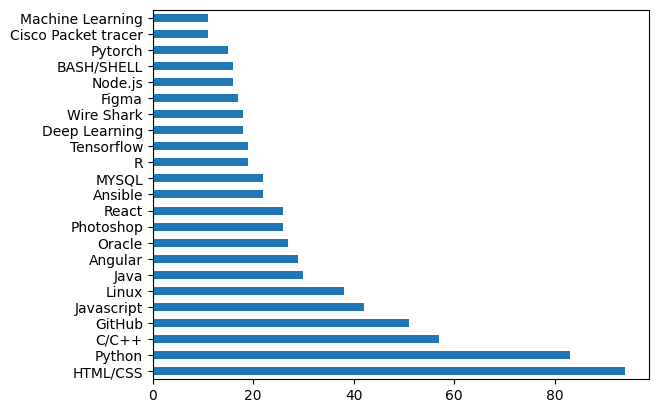

In [24]:
df_copy["Skill1"].value_counts().plot.barh();

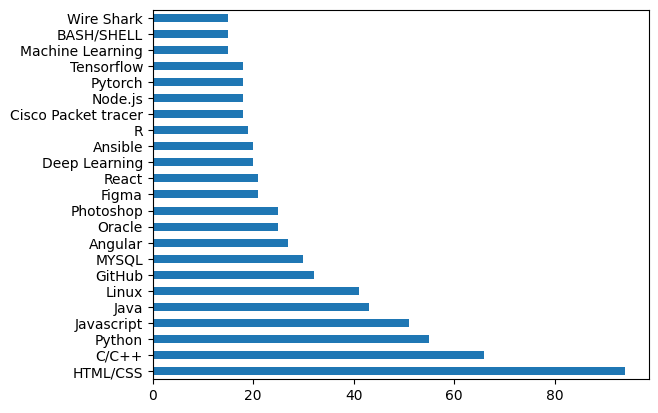

In [25]:
df_copy["Skill2"].value_counts().plot.barh();

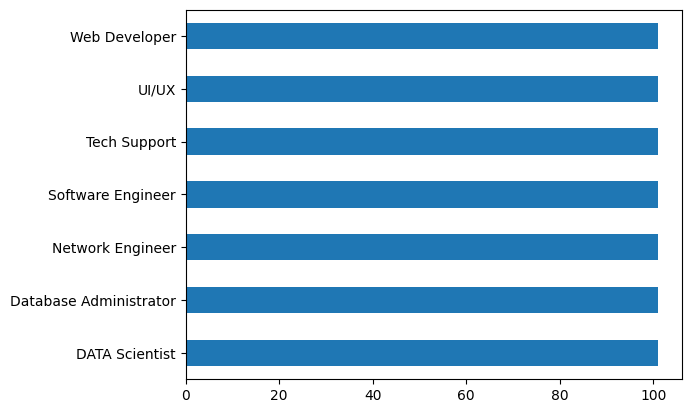

In [26]:
df_copy["Profile"].value_counts().plot.barh();

<Axes: xlabel='Profile', ylabel='None'>

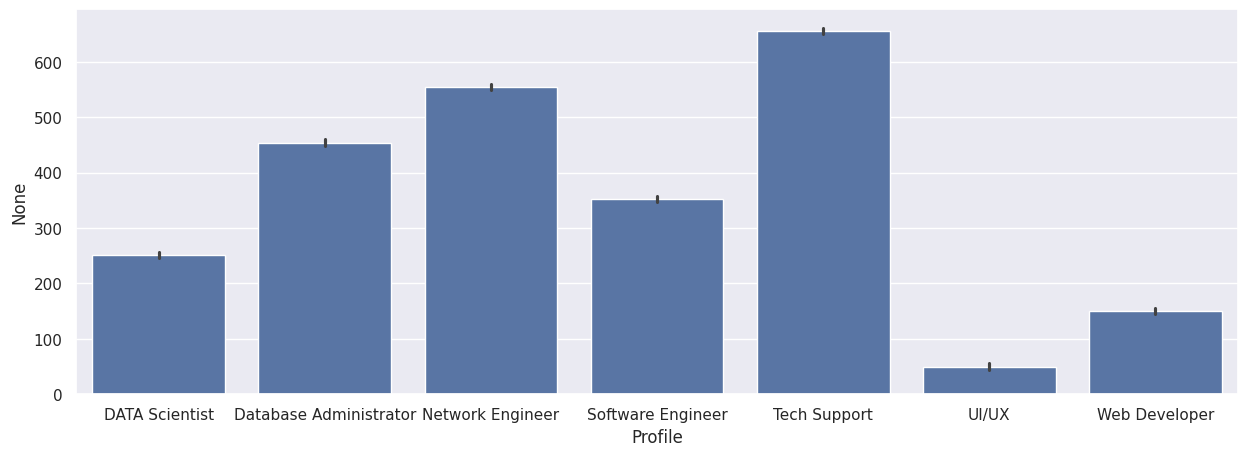

In [27]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="Profile",y=df_copy.Profile.index,data=df_copy)

Text(0.5, 1.0, 'Problem çözme profillere göre')

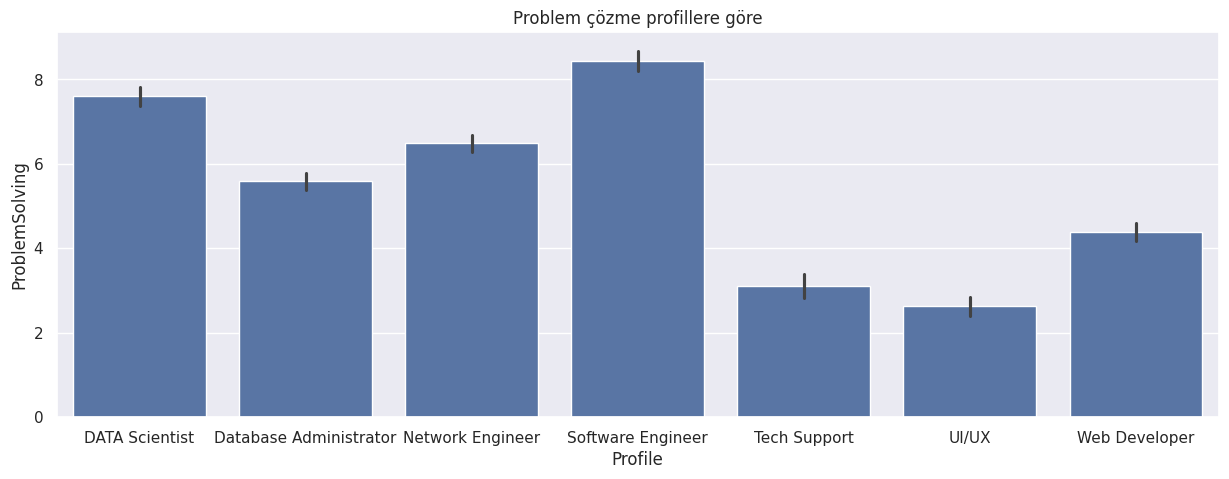

In [28]:
sns.barplot(x="Profile",y="ProblemSolving", data=df_copy)
plt.title("Problem çözme profillere göre")

In [29]:
unique_counts = df.nunique()
unique_counts

DSA                94
DBMS               95
OS                 90
CN                 96
Mathmetics         99
Aptitute           86
Comm               51
Problem Solving    10
Creative            9
Hackathons         11
Skill 1            23
Skill 2            23
Profile             7
dtype: int64

<ipython-input-30-1beaa680c7c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Profile").sum().plot.pie(y="Creative",autopct="%.1f%%",ylabel="",legend=False,figsize=(5,5))


<Axes: >

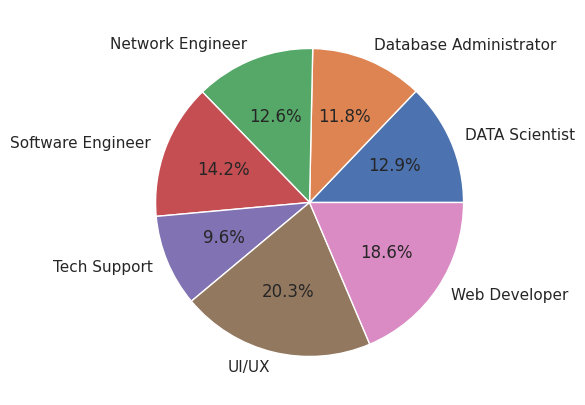

In [30]:
df.groupby("Profile").sum().plot.pie(y="Creative",autopct="%.1f%%",ylabel="",legend=False,figsize=(5,5))

<Axes: xlabel='Mathmetics', ylabel='Count'>

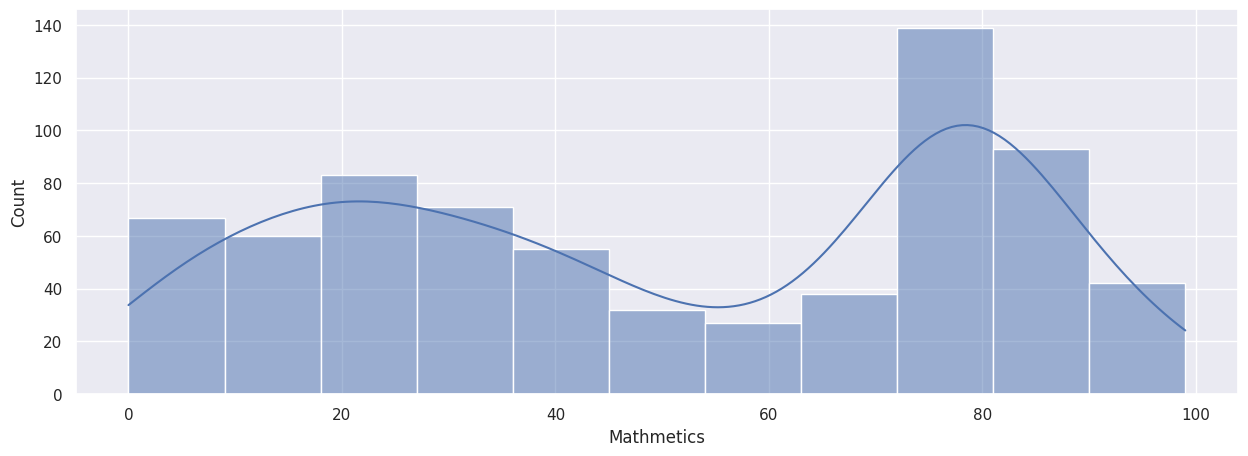

In [31]:
sns.histplot(df_copy["Mathmetics"],kde=True)

In [32]:
from os import mkdir
try:
  mkdir("Plots")
except:
    pass

mypaths="Plots"

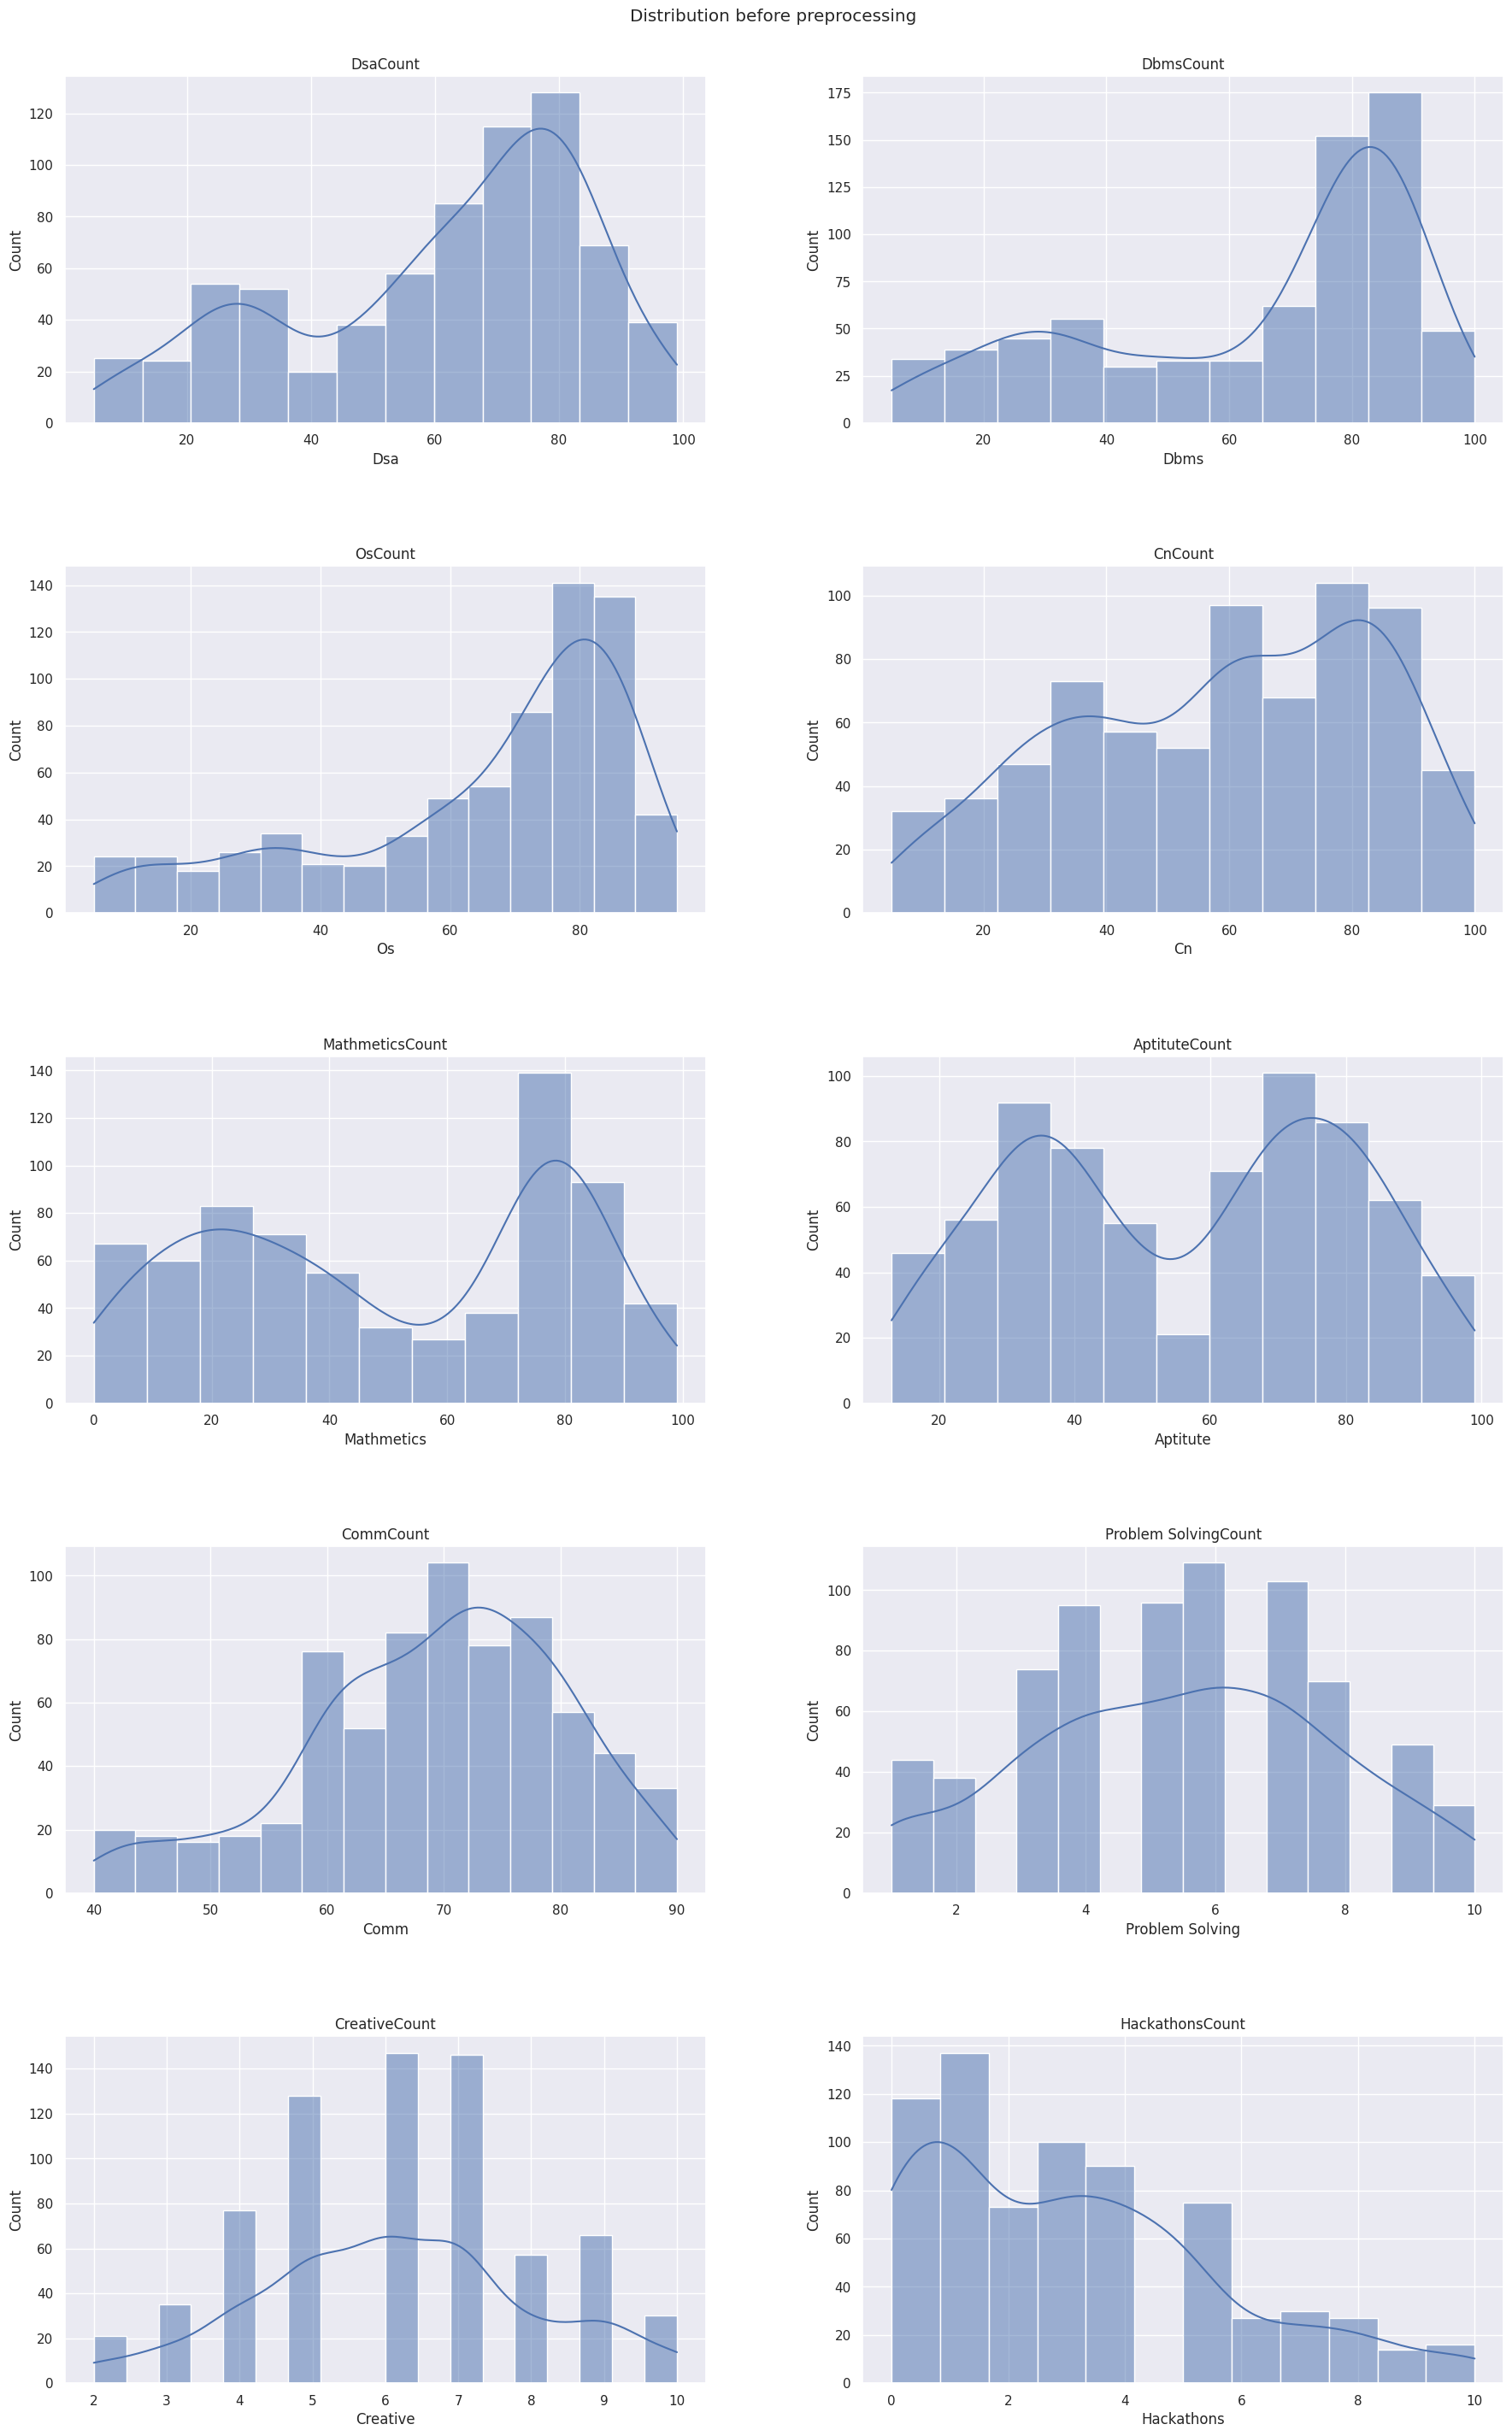

In [33]:
f, axes=plt.subplots(5,2,figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle("Distribution before preprocessing")
cols=df.select_dtypes(exclude="object").columns

x_axis=0
y_axis=0

for col in cols:
    sns.histplot(data=df,x=col,kde=True,ax=axes[x_axis,y_axis])
    axes[x_axis,y_axis].set_xlabel(col.title())
    axes[x_axis,y_axis].set_ylabel("Count")
    axes[x_axis,y_axis].set_title(f"{col.title()}Count")
    if y_axis==1:
      y_axis=0
      x_axis+=1
    else:
      y_axis+=1
plt.show()

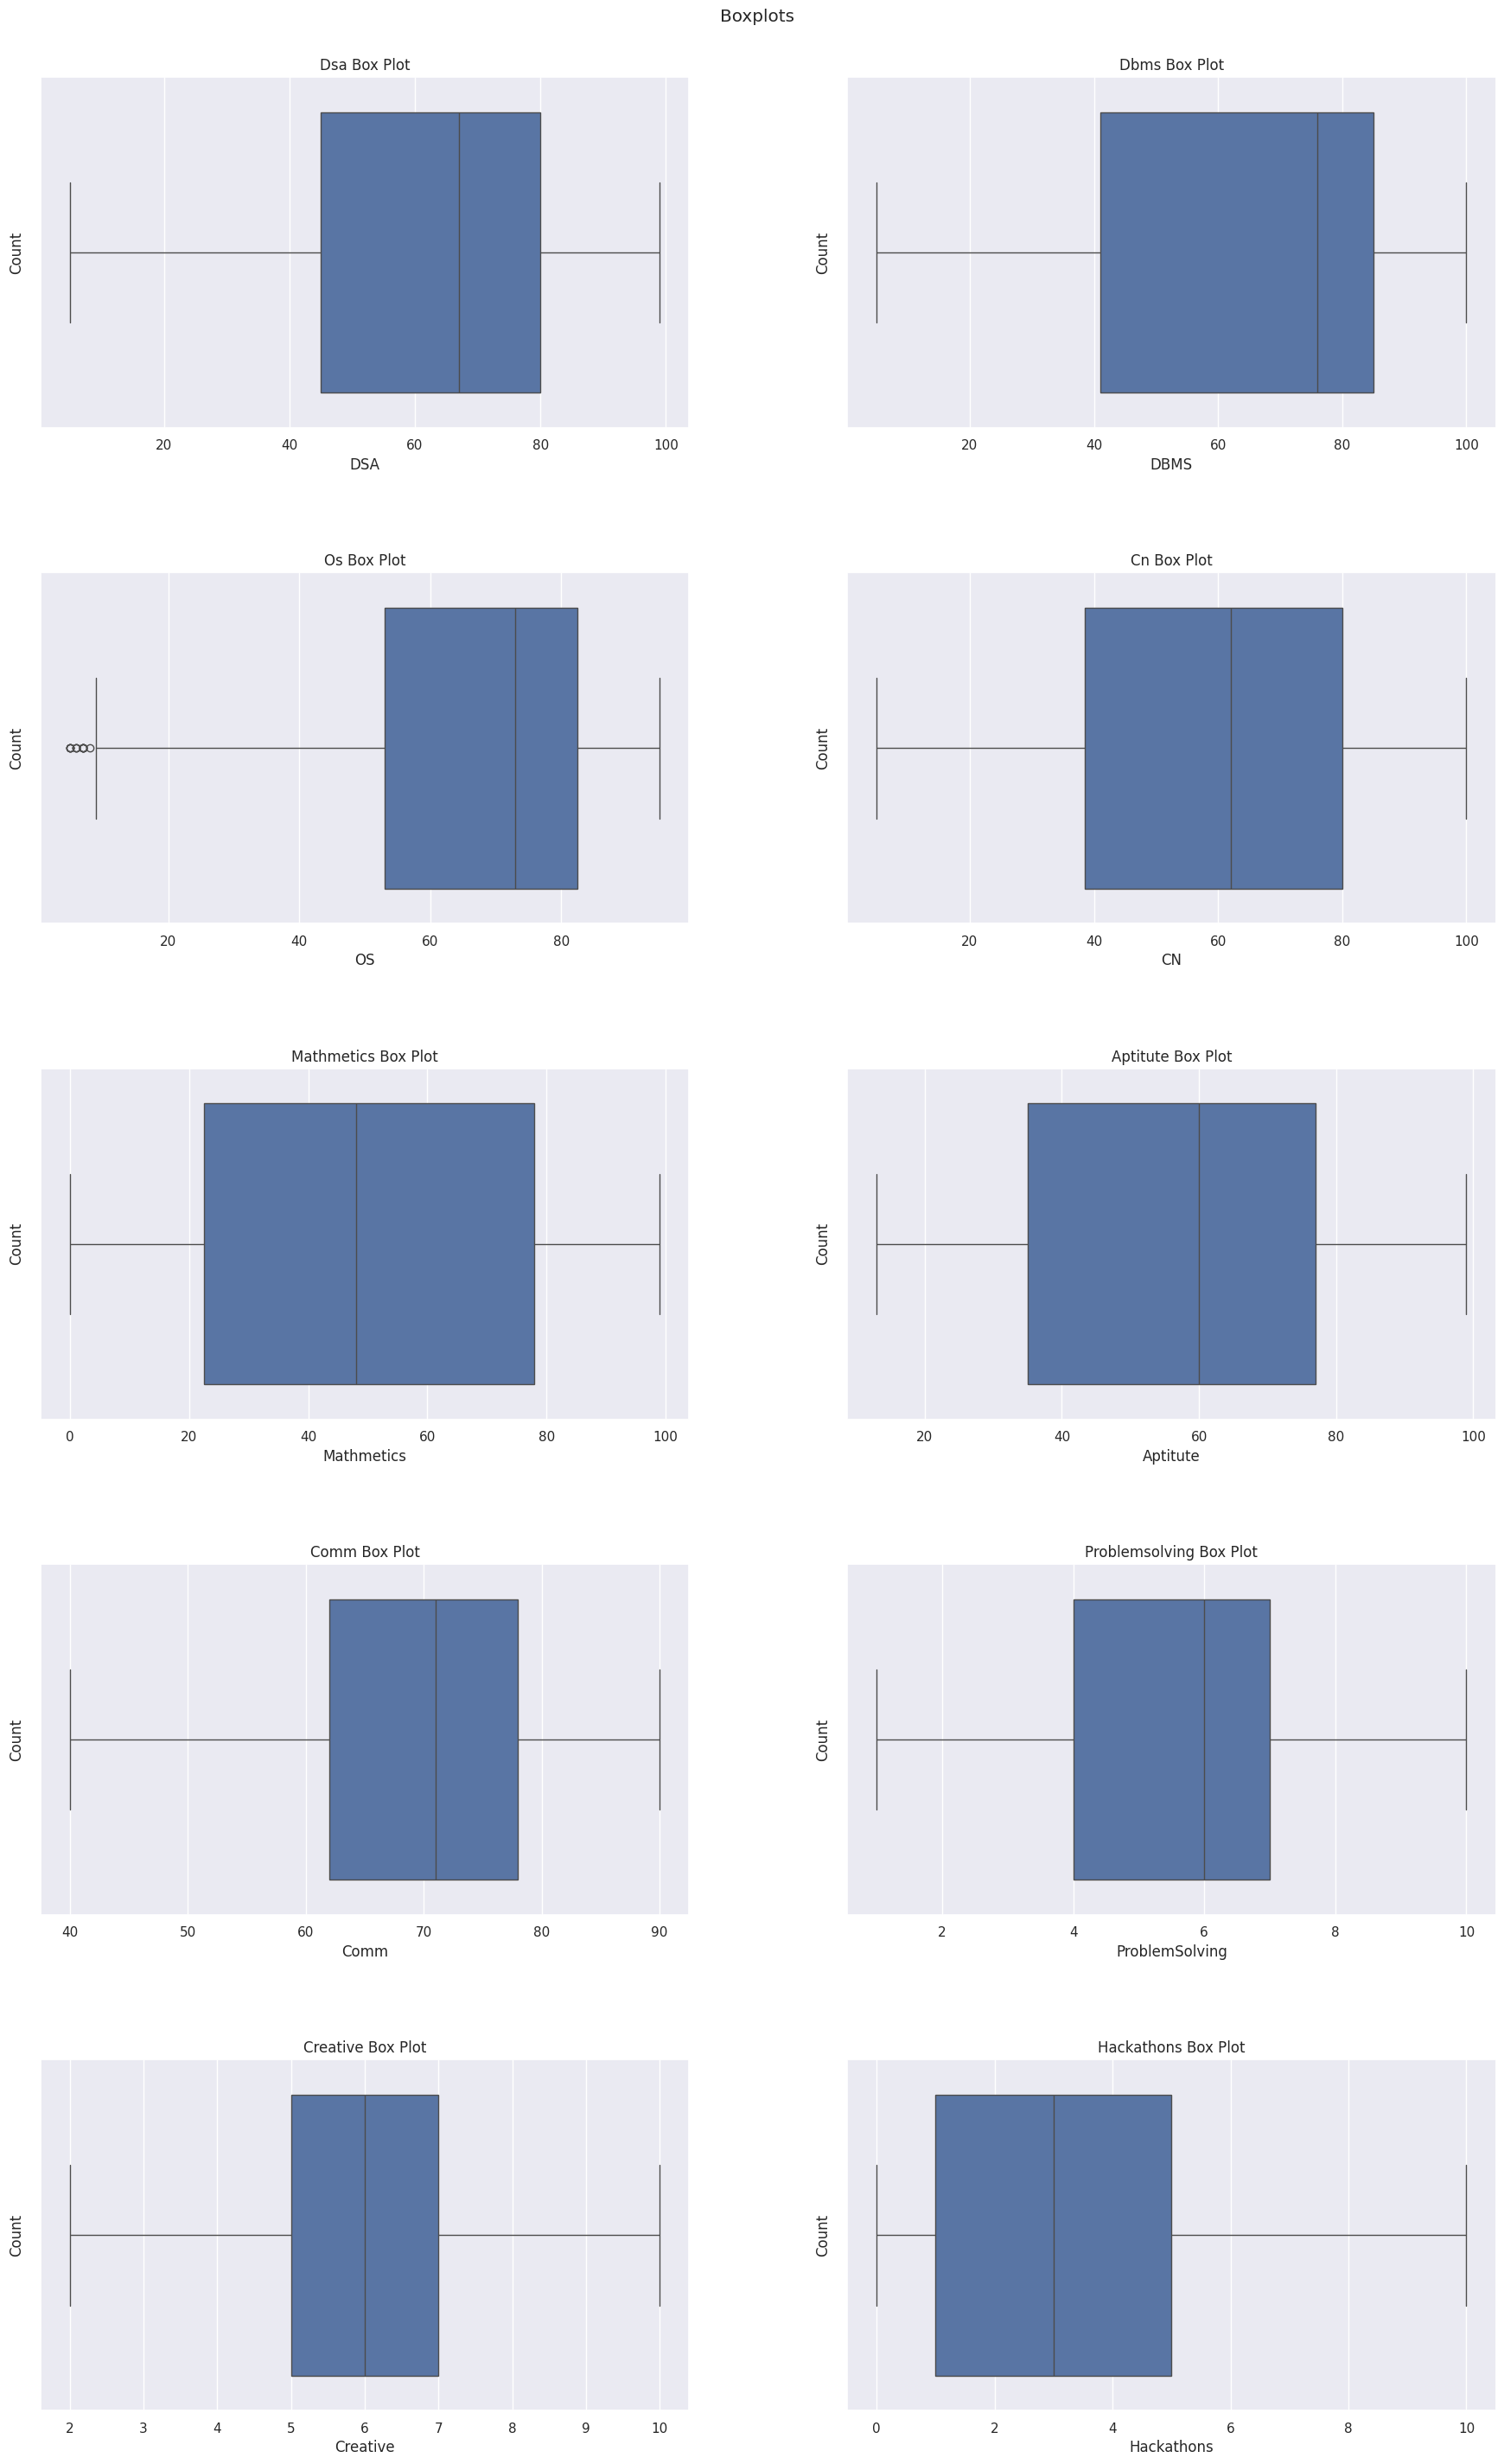

In [34]:
import numpy as np

cols=num_df.select_dtypes(exclude="object").columns
n = len(cols)

# Calculate the number of rows needed for the subplots
rows = np.ceil(n/2).astype(int)

f, axes=plt.subplots(rows,2,figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle("Boxplots")

x_axis=0
y_axis=0

for col in cols:
    sns.boxplot(data=num_df,x=col,ax=axes[x_axis,y_axis])
    axes[x_axis,y_axis].set_xlabel(col)
    axes[x_axis,y_axis].set_ylabel("Count")
    axes[x_axis,y_axis].set_title(f"{col.title()} Box Plot")
    if y_axis==1:
      y_axis=0
      x_axis+=1
    else:
      y_axis+=1
plt.show()


In [35]:
df_copy.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons,Skill1,Skill2,Profile
0,49,22,41,26,7,28,61,1,8,3,Javascript,Photoshop,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,GitHub,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,Figma,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,Figma,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,Figma,UI/UX


In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   DSA             707 non-null    int64   
 1   DBMS            707 non-null    int64   
 2   OS              707 non-null    int64   
 3   CN              707 non-null    int64   
 4   Mathmetics      707 non-null    int64   
 5   Aptitute        707 non-null    int64   
 6   Comm            707 non-null    int64   
 7   ProblemSolving  707 non-null    int64   
 8   Creative        707 non-null    int64   
 9   Hackathons      707 non-null    int64   
 10  Skill1          707 non-null    category
 11  Skill2          707 non-null    category
 12  Profile         707 non-null    category
dtypes: category(3), int64(10)
memory usage: 59.2 KB


In [37]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (707, 13)
Size      : 9191
Dimension : 2


In [38]:
df_copy.isnull().sum()

DSA               0
DBMS              0
OS                0
CN                0
Mathmetics        0
Aptitute          0
Comm              0
ProblemSolving    0
Creative          0
Hackathons        0
Skill1            0
Skill2            0
Profile           0
dtype: int64

In [39]:
df_copy.duplicated().sum()

0

In [40]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
DSA,707.00,60.98,23.84,5.00,45.00,67.00,80.00,99.00
DBMS,707.00,64.22,26.25,5.00,41.00,76.00,85.00,100.00
OS,707.00,64.50,23.48,5.00,53.00,73.00,82.50,95.00
CN,707.00,58.70,24.83,5.00,38.50,62.00,80.00,100.00
Mathmetics,707.00,49.95,29.69,0.00,22.50,48.00,78.00,99.00
Aptitute,707.00,56.23,23.87,13.00,35.00,60.00,77.00,99.00
Comm,707.00,69.25,11.24,40.00,62.00,71.00,78.00,90.00
ProblemSolving,707.00,5.47,2.36,1.00,4.00,6.00,7.00,10.00
Creative,707.00,6.15,1.89,2.00,5.00,6.00,7.00,10.00
Hackathons,707.00,3.10,2.59,0.00,1.00,3.00,5.00,10.00


In [41]:
df_copy.nunique()

DSA               94
DBMS              95
OS                90
CN                96
Mathmetics        99
Aptitute          86
Comm              51
ProblemSolving    10
Creative           9
Hackathons        11
Skill1            23
Skill2            23
Profile            7
dtype: int64

In [42]:
cat_df.head()

,Skill1,Skill2,Profile
0,Javascript,Photoshop,UI/UX
1,HTML/CSS,GitHub,UI/UX
2,Photoshop,Figma,UI/UX
3,Photoshop,Figma,UI/UX
4,HTML/CSS,Figma,UI/UX


In [43]:
num_df.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons
0,49,22,41,26,7,28,61,1,8,3
1,39,46,45,47,3,35,65,4,10,4
2,28,32,45,35,10,23,85,3,10,3
3,52,38,33,38,19,27,62,1,9,3
4,23,31,30,38,10,13,72,4,8,5


Text(0, 0.5, 'insan sayıları')

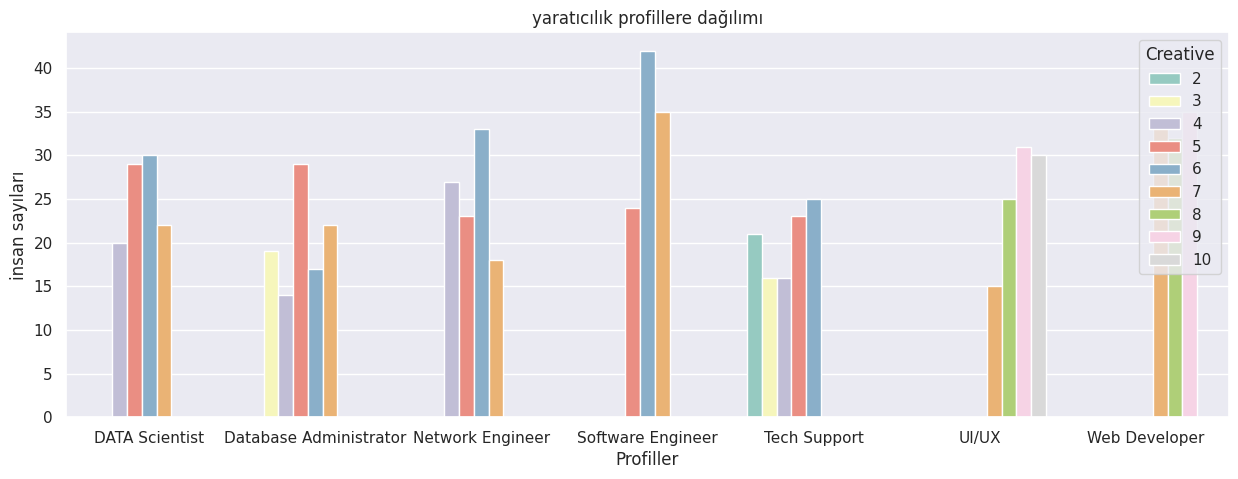

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, x='Profile', hue='Creative', palette="Set3",order=sorted(df_copy['Profile'].unique()))
plt.title('yaratıcılık profillere dağılımı');
plt.xlabel('Profiller')
plt.ylabel('insan sayıları')

<ipython-input-45-6a93d7c1df99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


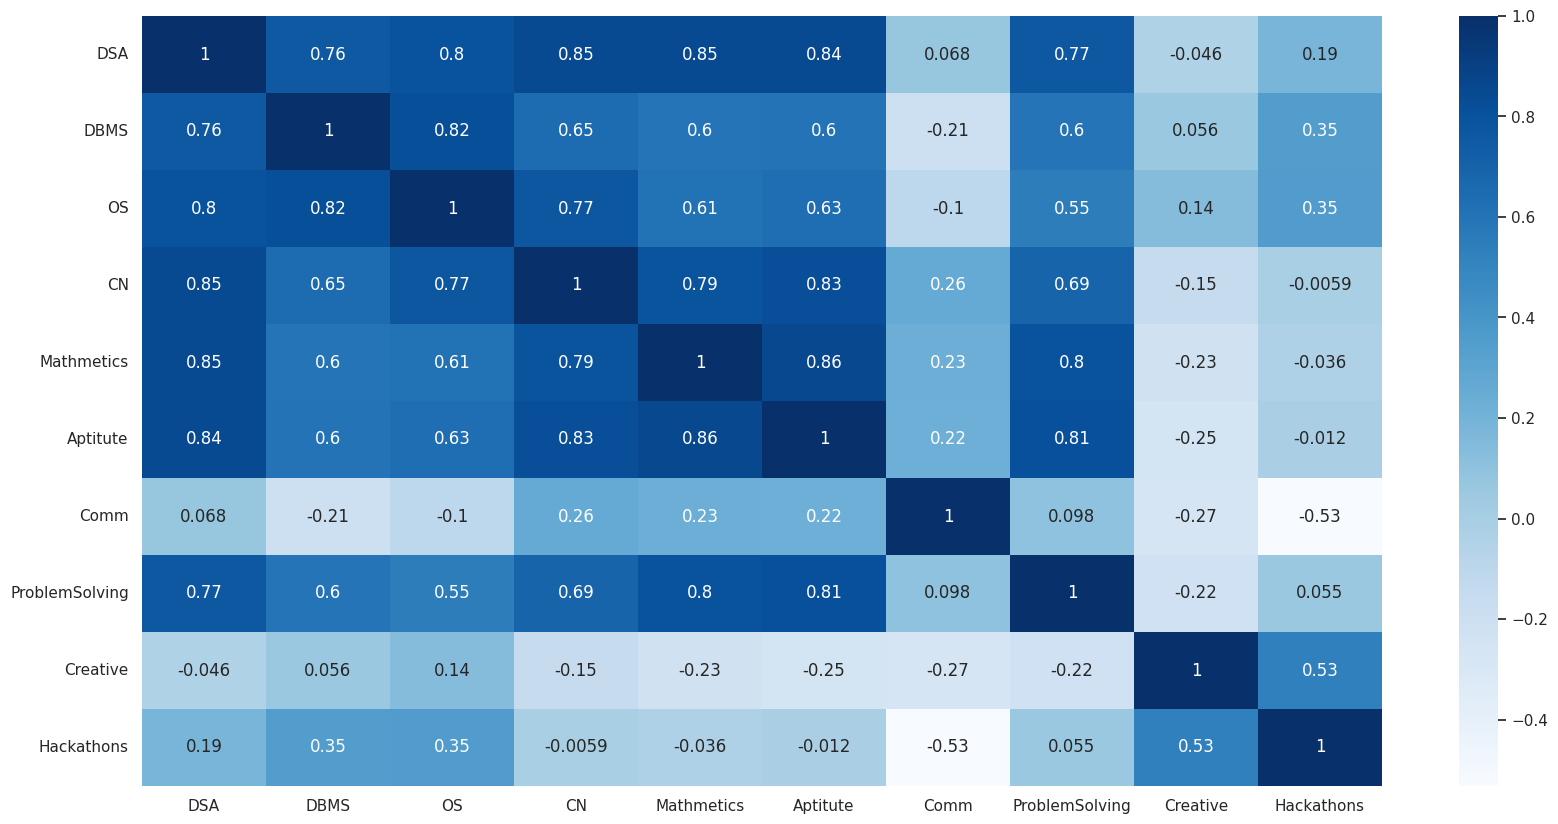

In [45]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

In [46]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

                Number of Missing Values  Ratio of Missing Values
DSA                                    0                     0.00
DBMS                                   0                     0.00
OS                                     0                     0.00
CN                                     0                     0.00
Mathmetics                             0                     0.00
Aptitute                               0                     0.00
Comm                                   0                     0.00
ProblemSolving                         0                     0.00
Creative                               0                     0.00
Hackathons                             0                     0.00
Skill1                                 0                     0.00
Skill2                                 0                     0.00
Profile                                0                     0.00


In [47]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

In [48]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [49]:
for col in num_df:
    print(col, check_outlier(num_df, col))

DSA False
DBMS False
OS True
CN False
Mathmetics False
Aptitute False
Comm False
ProblemSolving False
Creative False
Hackathons False


In [50]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DSA,707.00,60.98,23.84,5.00,45.00,67.00,80.00,99.00
DBMS,707.00,64.22,26.25,5.00,41.00,76.00,85.00,100.00
OS,707.00,64.50,23.48,5.00,53.00,73.00,82.50,95.00
CN,707.00,58.70,24.83,5.00,38.50,62.00,80.00,100.00
Mathmetics,707.00,49.95,29.69,0.00,22.50,48.00,78.00,99.00
Aptitute,707.00,56.23,23.87,13.00,35.00,60.00,77.00,99.00
Comm,707.00,69.25,11.24,40.00,62.00,71.00,78.00,90.00
ProblemSolving,707.00,5.47,2.36,1.00,4.00,6.00,7.00,10.00
Creative,707.00,6.15,1.89,2.00,5.00,6.00,7.00,10.00
Hackathons,707.00,3.10,2.59,0.00,1.00,3.00,5.00,10.00


In [51]:
def get_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    return outliers

# "OS" sütunundaki aykırı değerleri al
outliers = get_outliers(df_copy, "OS")

In [52]:
outliers

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons,Skill1,Skill2,Profile
609,8,5,7,24,8,29,67,4,4,0,Java,HTML/CSS,Tech Support
619,34,15,6,30,20,15,74,1,4,1,HTML/CSS,Java,Tech Support
620,26,31,7,8,11,18,77,4,2,0,HTML/CSS,C/C++,Tech Support
623,28,23,6,28,2,20,59,5,4,1,Python,Java,Tech Support
627,10,26,5,12,10,24,58,1,3,1,HTML/CSS,Java,Tech Support
631,10,31,7,33,4,15,76,3,6,1,Java,Python,Tech Support
642,17,27,5,28,18,24,62,3,4,1,Python,C/C++,Tech Support
691,21,34,8,5,5,16,83,2,6,0,Java,C/C++,Tech Support
692,8,11,5,5,5,31,75,3,4,0,C/C++,HTML/CSS,Tech Support
693,24,32,5,21,17,18,82,5,6,1,HTML/CSS,C/C++,Tech Support


<ipython-input-53-039d4d53dcc5>:20: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(y="OS", data=df_copy, inner="quartile", bw=0.2)


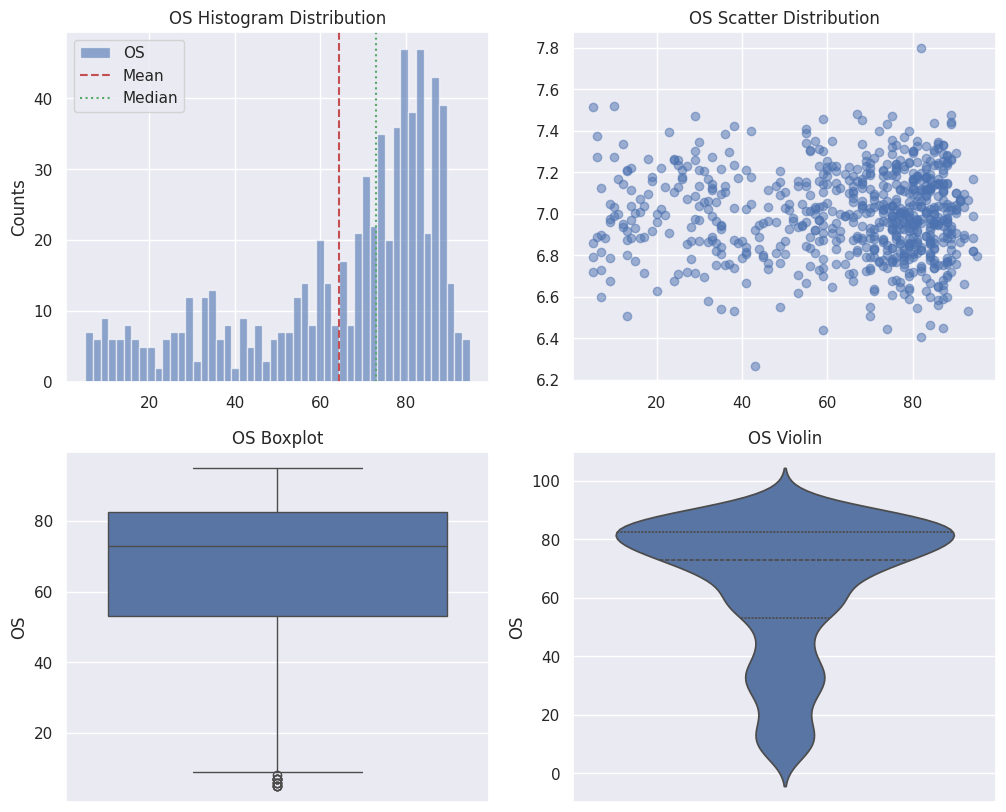

In [53]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['OS'].hist(bins=50, label='OS', alpha=0.6)
plt.axvline(np.mean(df_copy['OS']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['OS']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("OS Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['OS'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("OS Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="OS", data=df_copy)
plt.title("OS Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="OS", data=df_copy, inner="quartile", bw=0.2)
plt.title("OS Violin");

In [54]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [55]:
for col in num_df:
    print(col, replace_with_thresholds(df_copy, col))

DSA None
DBMS None
OS None
CN None
Mathmetics None
Aptitute None
Comm None
ProblemSolving None
Creative None
Hackathons None


<ipython-input-56-039d4d53dcc5>:20: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(y="OS", data=df_copy, inner="quartile", bw=0.2)


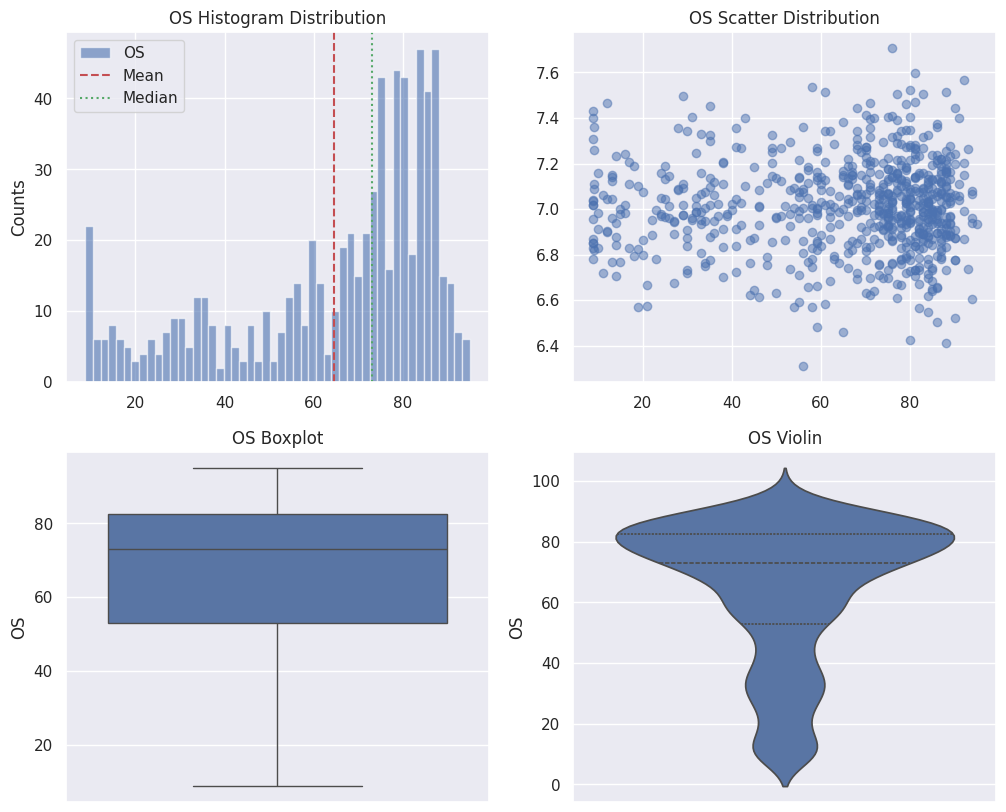

In [56]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['OS'].hist(bins=50, label='OS', alpha=0.6)
plt.axvline(np.mean(df_copy['OS']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['OS']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("OS Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['OS'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("OS Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="OS", data=df_copy)
plt.title("OS Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="OS", data=df_copy, inner="quartile", bw=0.2)
plt.title("OS Violin");

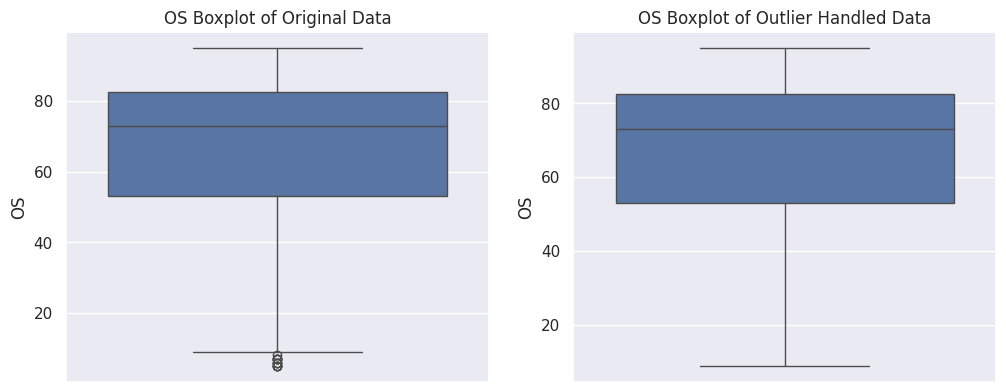

In [57]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y="OS", data=df)
plt.title("OS Boxplot of Original Data");

plt.subplot(2, 2, 2)
sns.boxplot(y="OS", data=df_copy)
plt.title("OS Boxplot of Outlier Handled Data");

In [58]:
for col in num_df:
    df_copy[col] = df_copy[col].astype('int64')

In [59]:
le = LabelEncoder()

for col in cat_df:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy.head(10)

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons,Skill1,Skill2,Profile
0,49,22,41,26,7,28,61,1,8,3,10,16,5
1,39,46,45,47,3,35,65,4,10,4,8,7,5
2,28,32,45,35,10,23,85,3,10,3,16,6,5
3,52,38,33,38,19,27,62,1,9,3,16,6,5
4,23,31,30,38,10,13,72,4,8,5,8,6,5
5,50,45,58,38,4,40,80,4,9,4,10,6,5
6,40,36,44,44,8,18,81,3,8,3,16,6,5
7,25,20,41,22,15,33,56,4,9,3,16,7,5
8,38,38,35,31,20,39,81,3,7,5,7,16,5
9,44,23,49,22,18,35,89,2,9,4,7,8,5


In [60]:
#scaler = StandardScaler()

#for col in num_df:
#    df_copy[col] = scaler.fit_transform(df_copy[[col]])

In [61]:
df_copy.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons,Skill1,Skill2,Profile
0,49,22,41,26,7,28,61,1,8,3,10,16,5
1,39,46,45,47,3,35,65,4,10,4,8,7,5
2,28,32,45,35,10,23,85,3,10,3,16,6,5
3,52,38,33,38,19,27,62,1,9,3,16,6,5
4,23,31,30,38,10,13,72,4,8,5,8,6,5


In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [63]:
y = df_copy["Profile"]
X = df_copy.drop(["Profile"], axis=1)

In [65]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [66]:
df_copy.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,ProblemSolving,Creative,Hackathons,Skill1,Skill2,Profile
0,-0.50,-1.61,-1.01,-1.32,-1.45,-1.18,-0.74,-1.89,0.98,-0.04,10,16,5
1,-0.92,-0.69,-0.84,-0.47,-1.58,-0.89,-0.38,-0.62,2.04,0.35,8,7,5
2,-1.38,-1.23,-0.84,-0.96,-1.35,-1.39,1.40,-1.05,2.04,-0.04,16,6,5
3,-0.38,-1.00,-1.35,-0.83,-1.04,-1.23,-0.65,-1.89,1.51,-0.04,16,6,5
4,-1.59,-1.27,-1.48,-0.83,-1.35,-1.81,0.24,-0.62,0.98,0.73,8,6,5


In [67]:
loj_model.intercept_

array([-4.77410178, -2.69084701, -3.70792764, -4.40334844, -1.24976465,
       -4.00958106, -2.9762822 ])

In [68]:
loj_model.coef_

array([[ 8.77616878e-01,  1.41487192e+00, -1.92566156e+00,
        -2.49353433e+00,  4.19879836e+00, -5.44277833e-01,
        -3.44041336e-01,  2.83846502e-01, -1.09300938e-03,
        -8.29910899e-01,  2.71663250e-02,  4.36653470e-02],
       [-1.07985522e+00,  4.95739005e+00,  1.09361081e-01,
         7.32134411e-01, -2.19234398e+00, -7.19733830e-02,
         8.91935420e-01, -3.42185641e-01, -9.89936785e-01,
        -1.79710932e+00, -7.48423919e-02, -9.52821573e-02],
       [ 4.73155039e-01, -3.29038585e+00,  1.57466512e+00,
         2.43733106e+00,  1.46321361e+00,  8.66986297e-02,
         8.39269787e-01, -4.65088544e-01, -8.58599727e-02,
        -1.72001550e+00, -6.96502950e-02, -5.99498575e-02],
       [ 1.33631882e+00,  8.85922736e-01,  6.63490060e-01,
         3.65373092e-01, -9.46703985e-02,  3.18212283e+00,
        -2.67160612e-01,  1.20471338e+00,  1.49869000e-01,
         1.89895597e+00, -1.38121723e-01, -1.32968203e-01],
       [-1.00355476e+00, -9.50605932e-01, -1.7497023

In [69]:
#df_copy=pd.get_dummies(df_copy, columns = ["Profile"], prefix = ["Profile"],drop_first=True).head()

In [182]:
y = df_copy["Profile"]
X = df_copy.drop(["Profile"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33,
                                                    random_state = 42)


In [183]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [72]:
#loj = LogisticRegression(solver = "liblinear")
#loj_model = loj.fit(X_res, y_res)


In [73]:
#model = LogisticRegression(random_state=42)
#model.fit(X_res, y_res)
#predictions = model.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
#print(f"Accuracy Score: {accuracy}")


Accuracy Score: 1.0


In [74]:
accuracy_score(y_test, loj_model.predict(X_test))

1.0

In [75]:
from sklearn.model_selection import cross_val_score

cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9933333333333334

In [184]:
from sklearn.feature_selection import SelectKBest, f_classif

# En iyi 5 özelliği seçmek için SelectKBest ve f_classif kullanılıyor
X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Veri seti eğitim ve test setlerine ayrılıyor
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

# Lojistik Regresyon modeli oluşturuluyor
model = LogisticRegression(random_state=42)

# Model eğitiliyor
model.fit(X_train, y_train)

# Tahminler yapılıyor
predictions = model.predict(X_test)

# Doğruluk skoru ve confusion matrisi hesaplanıyor
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print(f"Accuracy Score: {accuracy}")
print(f"Confusion Matrix: \n{confusion}")


Accuracy Score: 0.7863247863247863
Confusion Matrix: 
[[35  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  7  4 27  0  0  0]
 [ 4  1  4  0 15  0  5]
 [ 0  7  1  0  9 20  7]
 [ 0  0  0  0  0  1 30]]


In [186]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [109]:
nb_model.predict(X_test)[0:10]

array([1, 5, 5, 0, 3, 3, 0, 3, 3, 6])

In [110]:
nb_model.predict_proba(X_test)[0:10]

array([[9.87346635e-012, 9.99890026e-001, 6.98484116e-018,
        1.31426421e-014, 9.35802612e-039, 1.73109958e-018,
        1.09973528e-004],
       [3.49394905e-069, 1.22158893e-039, 3.95999162e-105,
        1.64215103e-114, 7.64212467e-002, 9.23578753e-001,
        7.64242629e-040],
       [2.72091937e-063, 3.34350319e-040, 7.23272257e-077,
        8.79694988e-096, 2.35684498e-004, 9.99764316e-001,
        9.28370795e-053],
       [9.99999882e-001, 4.37993770e-009, 6.68390050e-009,
        1.07312049e-007, 4.93150824e-060, 5.18278763e-024,
        4.72918728e-016],
       [2.37875853e-007, 4.50352836e-006, 1.71170994e-003,
        9.98283549e-001, 5.89697322e-058, 1.89487256e-027,
        4.29594922e-014],
       [1.46108418e-011, 1.02735940e-004, 1.30620920e-002,
        9.86835172e-001, 1.84404405e-064, 1.34295291e-031,
        2.77228916e-014],
       [9.99989261e-001, 1.07303134e-005, 9.15172793e-012,
        8.36394873e-009, 8.81851020e-058, 2.09810892e-023,
        1.33510091

In [187]:
y_pred = nb_model.predict(X_test)

In [188]:
accuracy_score(y_test, y_pred)

0.9786324786324786

In [189]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9782608695652175

In [114]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [115]:
y_pred = knn_model.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred)

0.9829059829059829

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.96      0.98        27
           2       0.97      1.00      0.98        30
           3       1.00      0.97      0.99        38
           4       0.97      0.97      0.97        29
           5       0.98      0.98      0.98        44
           6       0.97      1.00      0.98        31

    accuracy                           0.98       234
   macro avg       0.98      0.98      0.98       234
weighted avg       0.98      0.98      0.98       234



In [118]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [119]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [120]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.989450354609929
En iyi parametreler: {'n_neighbors': 7}


In [121]:

knn = KNeighborsClassifier(7)
knn_tuned = knn.fit(X_train, y_train)

In [122]:
knn_tuned.score(X_test, y_test)

0.9829059829059829

In [123]:
y_pred = knn_tuned.predict(X_test)

In [124]:
accuracy_score(y_test, y_pred)

0.9829059829059829

In [125]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [126]:
y_pred = svm_model.predict(X_test)

In [127]:
accuracy_score(y_test, y_pred)

0.9658119658119658

In [128]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [129]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [130]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [131]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9658119658119658

In [132]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [133]:
svc_model

SVC()

In [134]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9786324786324786

In [135]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [136]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params,
                         cv = 10,
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [137]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 0.1, 'gamma': 0.001}


In [138]:
svc_tuned = SVC(C = 0.1, gamma = 0.001).fit(X_train, y_train)

In [139]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9829059829059829

In [140]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [141]:
cart_model

DecisionTreeClassifier()

In [142]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9914529914529915

In [143]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [144]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [145]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 7, 'min_samples_split': 2}


In [146]:
cart = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [147]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9914529914529915

In [148]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [149]:
rf_model

RandomForestClassifier()

In [150]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9957264957264957

In [121]:
#rf_params = {"max_depth": [2,5,8,10],"max_features": [2,5,8],"n_estimators": [10,500,1000],"min_samples_split": [2,5,10]}

In [122]:
#rf_model = RandomForestClassifier()

#rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 10,n_jobs = -1,verbose = 2)

In [123]:
#rf_cv_model.fit(X_train, y_train)

In [124]:
#print("En iyi parametreler: " + str(rf_cv_model.best_params_))

In [125]:
#rf_tuned = RandomForestClassifier(max_depth = 2,max_features = 5,min_samples_split = 2,n_estimators = 500)

#rf_tuned.fit(X_train, y_train)

In [126]:
#y_pred = rf_tuned.predict(X_test)
#accuracy_score(y_test, y_pred)

In [151]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [152]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9914529914529915

In [129]:
#gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],"n_estimators": [100,500,100],"max_depth": [3,5,10],"min_samples_split": [2,5,10]}

In [130]:
#gbm = GradientBoostingClassifier()

#gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [131]:
#gbm_cv.fit(X_train, y_train)

In [132]:
#print("En iyi parametreler: " + str(gbm_cv.best_params_))

In [133]:
#gbm = GradientBoostingClassifier(learning_rate = 0.01,max_depth = 3,min_samples_split = 5,n_estimators = 500)

In [134]:
#gbm_tuned =  gbm.fit(X_train,y_train)

In [135]:
#y_pred = gbm_tuned.predict(X_test)
#accuracy_score(y_test, y_pred)

In [136]:
#!pip install xgboost
#from xgboost import XGBClassifier

In [153]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [154]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [155]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9914529914529915

In [140]:
#xgb_params = {'n_estimators': [100, 500, 1000, 2000],'subsample': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5,6],'learning_rate': [0.1,0.01,0.02,0.05],"min_samples_split": [2,5,10]}

In [141]:
#xgb = XGBClassifier()

#xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [142]:
#xgb_cv_model.fit(X_train, y_train)

In [143]:
#xgb_cv_model.best_params_

In [144]:
#xgb = XGBClassifier(learning_rate = 0.01,max_depth = 6,min_samples_split = 2,n_estimators = 100,subsample = 0.8)

In [145]:
#xgb_tuned =  xgb.fit(X_train,y_train)

In [146]:
#y_pred = xgb_tuned.predict(X_test)
#accuracy_score(y_test, y_pred)

In [156]:
from lightgbm import LGBMClassifier

In [157]:
lgbm_model = LGBMClassifier(verbose=-1).fit(X_train, y_train)


In [158]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9914529914529915

In [150]:
#lgbm_params = {'n_estimators': [100, 500, 1000, 2000],'subsample': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5,6],'learning_rate': [0.1,0.01,0.02,0.05],"min_child_samples": [5,10,20]}

In [151]:
#lgbm = LGBMClassifier()

#lgbm_cv_model = GridSearchCV(lgbm, lgbm_params,cv = 10,n_jobs = -1,verbose = 2)



In [152]:
#lgbm_cv_model.fit(X_train, y_train)

In [159]:
#lgbm_cv_model.best_params_

In [160]:
#lgbm = LGBMClassifier(learning_rate = 0.01,max_depth = 3, subsample = 0.6,n_estimators = 500,min_child_samples = 20)

In [155]:
#lgbm_tuned = lgbm.fit(X_train,y_train)

In [156]:
#y_pred = lgbm_tuned.predict(X_test)
#accuracy_score(y_test, y_pred)

In [161]:
!pip install catboost
from catboost import CatBoostClassifier

In [162]:
cat_model = CatBoostClassifier(verbose=False).fit(X_train, y_train)

In [163]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9914529914529915

In [160]:
#catb_params = {'iterations': [200,500],'learning_rate': [0.01,0.05, 0.1],'depth': [3,5,8] }

In [161]:
#catb = CatBoostClassifier()
#catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
#catb_cv_model.fit(X_train, y_train)
#catb_cv_model.best_params_

In [162]:
#catb_cv_model.best_params_

In [163]:
#catb = CatBoostClassifier(iterations = 200,learning_rate = 0.05,depth = 5)
#catb_tuned = catb.fit(X_train, y_train)
#y_pred = catb_tuned.predict(X_test)

In [164]:
#y_pred = catb_tuned.predict(X_test)
#accuracy_score(y_test, y_pred)

In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score

modeller = [
    knn_tuned,
    model,
    svc_tuned,
    nb_model,
    cart_tuned,
    rf_model,
    gbm_model,
    cat_model,
    lgbm_model,
    xgb_model
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)

    dogruluk = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))
    print("Recall: {:.4%}".format(recall))
    print("Precision: {:.4%}".format(precision))
    print("F1 Score: {:.4%}".format(f1))


----------------------------
KNeighborsClassifier:
Accuracy: 98.2906%
Recall: 98.2906%
Precision: 98.3177%
F1 Score: 98.2906%
----------------------------
LogisticRegression:
Accuracy: 78.6325%
Recall: 78.6325%
Precision: 82.0585%
F1 Score: 77.2932%
----------------------------
SVC:
Accuracy: 98.2906%
Recall: 98.2906%
Precision: 98.3177%
F1 Score: 98.2906%
----------------------------
GaussianNB:
Accuracy: 97.8632%
Recall: 97.8632%
Precision: 97.9288%
F1 Score: 97.8608%
----------------------------
DecisionTreeClassifier:
Accuracy: 99.1453%
Recall: 99.1453%
Precision: 99.1682%
F1 Score: 99.1433%
----------------------------
RandomForestClassifier:
Accuracy: 99.5726%
Recall: 99.5726%
Precision: 99.5821%
F1 Score: 99.5713%
----------------------------
GradientBoostingClassifier:
Accuracy: 99.1453%
Recall: 99.1453%
Precision: 99.1682%
F1 Score: 99.1433%
----------------------------
CatBoostClassifier:
Accuracy: 99.1453%
Recall: 99.1453%
Precision: 99.1682%
F1 Score: 99.1433%
-------------

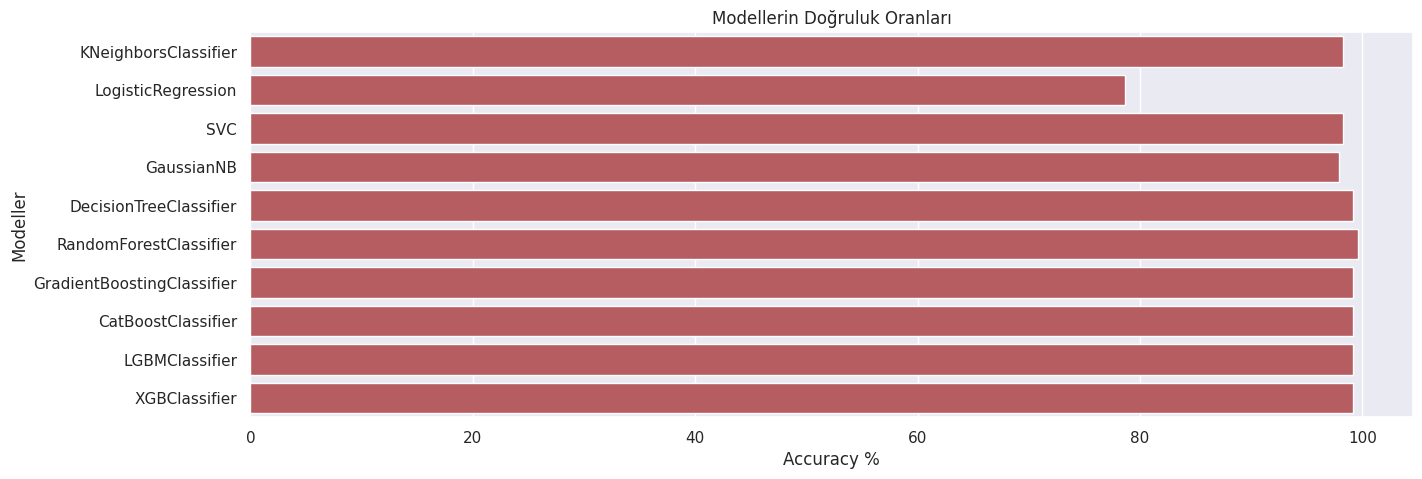

In [166]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)


sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

<Axes: >

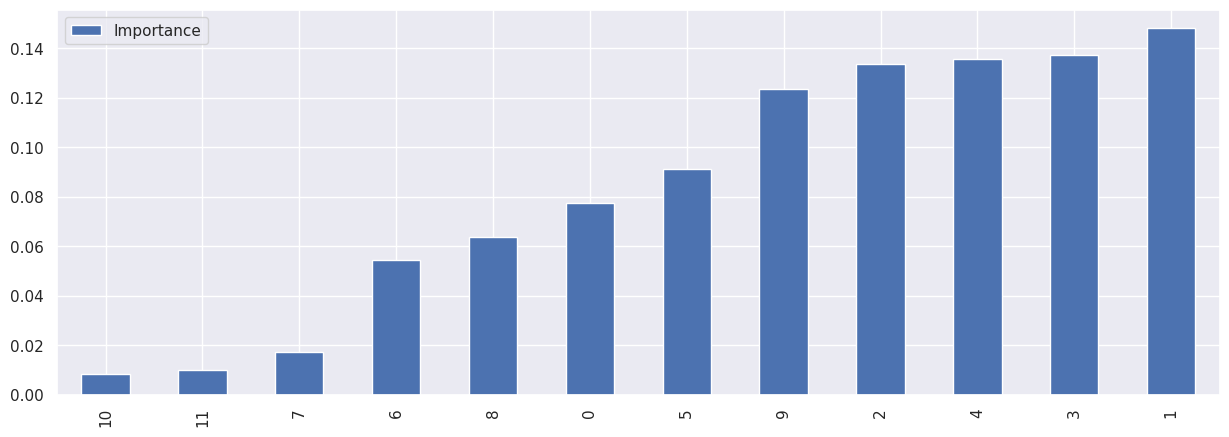

In [167]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
importance = model.feature_importances_

imp_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importance" : importance })
imp_df.set_index("Importance")

imp_df = imp_df.sort_values("Importance")

imp_df.plot.bar()

In [168]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify=y)
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 12, 15, 17, 20],
    'min_samples_split': [10, 12, 15, 17, 20],
    'max_leaf_nodes': [20, 25, 30, 35, 40],
    'min_samples_leaf': [2, 5, 7, 10],
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17, 20],
                         'max_leaf_nodes': [20, 25, 30, 35, 40],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [10, 12, 15, 17, 20]},
             scoring='accuracy')

In [169]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [171]:
DT_Model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 20)

In [172]:
DT_Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

In [173]:
test_accuracy = DT_Model.score(X_test, y_test)

In [174]:
print("Test Accuracy:", round(test_accuracy*100,2))

Test Accuracy: 100.0


In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Veri seti eğitim ve test setlerine ayrılıyor
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

# GBM modeli oluşturuluyor
model = GradientBoostingClassifier(random_state=42)

# Model eğitiliyor
model.fit(X_train, y_train)

# Tahminler yapılıyor
predictions = model.predict(X_test)

# Doğruluk skoru ve confusion matrisi hesaplanıyor
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print(f"Accuracy Score: {accuracy}")
print(f"Confusion Matrix: \n{confusion}")


Accuracy Score: 0.9914529914529915
Confusion Matrix: 
[[35  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  1]
 [ 0  0 30  0  0  0  0]
 [ 0  0  0 38  0  0  0]
 [ 0  0  0  0 28  1  0]
 [ 0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 31]]
